In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def linear(x):
    return 3.1*(x-1) + 2

def sin(x):
    return 2*np.sin(x - 1) + 1

def pdfLike(x):
    return (10**(-3*x) + (1-10**x)**5 - 1)

def secondPdfLike(x):
    return (20*(1-10**x)**3 + 12*(10**(-5*x)))

def interpLinear(x,y):
    y0 = y[0]
    x0 = x[0]
    m = (y[2] - y[1])/(x[2] - x[1])
    return m,x0,y0

def linearModel(x,m,x0,y0):
    return m*(x-x0) + y0

In [47]:
def interpPowerLaw(x,y):
    y0 = y[0]
    x0 = x[0]
    
    print(y[2] - y0,y[1] - y0,x[2] - x0,x[1] - x0)
    # Well behaved PDFs are always monotonically increasing/decreasing at the boundaries
    # i.e this will never be used exactly at a turning point
    # Currently negatives do not work, fix this 
    
    if (x[2] - x0) > 0 and (x[1] - x0) > 0 and (y[2] - y0) > 0 and (y[1] - y0) > 0:
        b = (np.log(y[2] - y0) - np.log(y[1] - y0)) / (np.log(x[2] - x0) - np.log(x[1] - x0))
        a = np.exp( np.log(y[2] - y[0]) - b*np.log(x[2] - x0) )
        return a,b,x0,y0
    
    elif (x[2] - x0) < 0 and (x[1] - x0) < 0 and (y[2] - y0) > 0 and (y[1] - y0) > 0:
        b = (np.log(y[2] - y0) - np.log(y[1] - y0)) / (np.log((-x[2] + x0)) - np.log((-x[1] + x0)))
        a = np.exp( np.log(y[2] - y[0]) - b*np.log((-x[2] + x0)) )
        return a,b,x0,y0
    
    elif (x[2] - x0) < 0 and (x[1] - x0) < 0 and (y[2] - y0) < 0 and (y[1] - y0) < 0:
        b = (np.log( -(y[2] - y0) ) - np.log( -(y[1] - y0) )) / (np.log((-x[2] + x0)) - np.log((-x[1] + x0)))
        a = -np.exp( np.log( -(y[2] - y[0]) ) - b*np.log((-x[2] + x0)) )
        return a,b,x0,y0
    
    elif (x[2] - x0) > 0 and (x[1] - x0) > 0 and (y[2] - y0) < 0 and (y[1] - y0) < 0:
        b = (np.log( -(y[2] - y0) ) - np.log( -(y[1] - y0) )) / (np.log(x[2] - x0) - np.log(x[1] - x0))
        a = -np.exp( np.log( -(y[2] - y[0]) ) - b*np.log(x[2] - x0) )
        return a,b,x0,y0
    else:
        b = 0
        a = 0
        return a,b,x0,y0
        

def powerLaw(x,a,b,x0,y0):
    if x-x0 > 0:
        return a*(x-x0)**b + y0
    else:
        return a*(-x+x0)**b + y0

def secondPowerLaw(x,a,b,x0,y0):
    if x-x0 > 0:
        return (a*b * ( (b-1)*(x-x0)**(b-2) - np.log(10)*(x - x0)**(b-1) ) ) / (10**(2*x)*np.log(10)**2)
    else:
        return -(a*b * ( -(b-1)*(x0-x)**(b-2) - np.log(10)*(x0 - x)**(b-1) ) ) / (10**(2*x)*np.log(10)**2)

-1012952706987083.9 -4.423192307692307 18602740293707.105
Error: 39.711835%


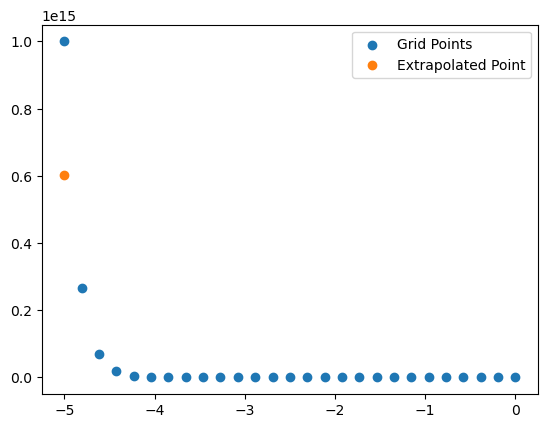

In [5]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)


m,x0,y0 = interpLinear(test_x[::-1][-4:-1],test_y[::-1][-4:-1])
print(m,x0,y0)
y = linearModel(test_x[0],m,x0,y0)
print("Error: {:.6f}%".format(100*(test_y[0] - y)/test_y[0]))

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()

-55.16500830639474 -0.5778076923076929 53.34357988908804
Error: -310416.546761%


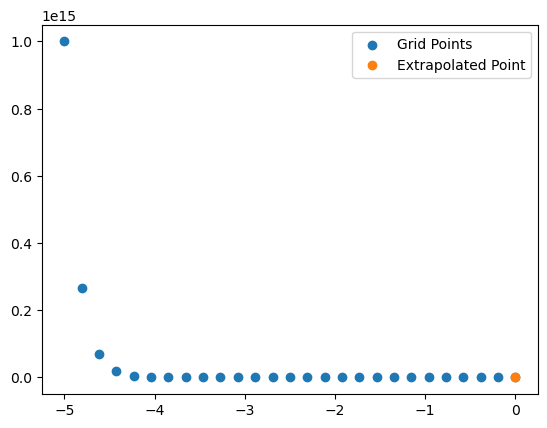

In [6]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)


m,x0,y0 = interpLinear(test_x[-4:-1],test_y[-4:-1])
print(m,x0,y0)
y = linearModel(test_x[-1],m,x0,y0)
print("Error: {:.6f}%".format(100*(test_y[-1] - y)/test_y[-1]))

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

[1.20000000e+26 1.31170173e+25 1.43380120e+24 1.56726626e+23
 1.71315489e+22 1.87262353e+21 2.04693628e+20 2.23747488e+19
 2.44574974e+18 2.67341180e+17 2.92226575e+16 3.19428420e+15
 3.49162344e+14 3.81664043e+13 4.17191155e+12 4.56025301e+11
 4.98474314e+10 5.44874687e+09 5.95594242e+08 6.51035153e+07
 7.11638033e+06 7.77893087e+05 8.50402073e+04 9.30232679e+03
 1.02002738e+03 1.11979078e+02 1.21389537e+01]
246364576400367.78 51604938622351.06 -0.3845384615384617 -0.19226923076923086
2126315886677428.8 2.2552137885195322 -4.423192307692307 18602740293707.105
Error: 83.080011%


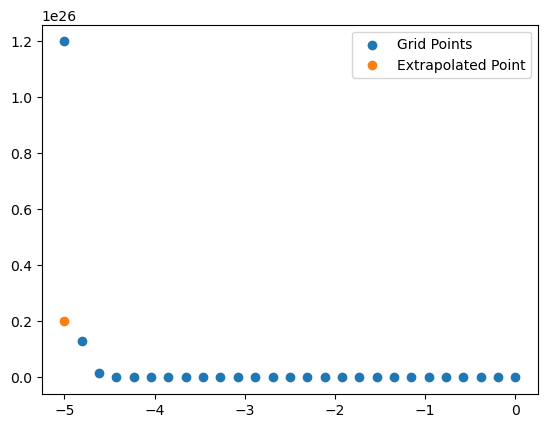

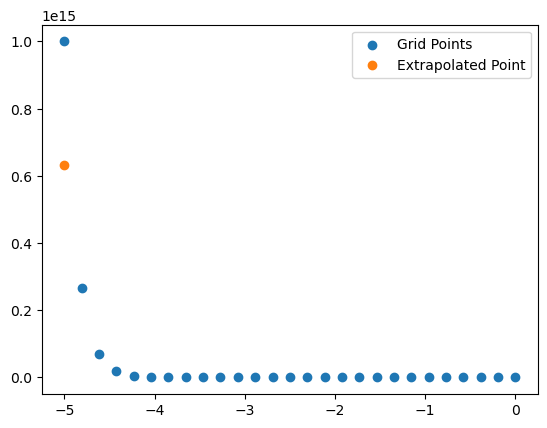

In [48]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)
print(test_dy)
a,b,x0,y0 = interpPowerLaw(test_x[::-1][-4:-1],test_y[::-1][-4:-1])
print(a,b,x0,y0)
dy = secondPowerLaw(test_x[0],a,b,x0,y0)
y = powerLaw(test_x[0],a,b,x0,y0)
print("Error: {:.6f}%".format(100*(test_dy[0] - dy)/test_dy[0]))

plt.figure()
plt.scatter(test_x,test_dy, label="Grid Points")
plt.scatter(test_x[0],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()

[1.20000000e+26 1.31170173e+25 1.43380120e+24 1.56726626e+23
 1.71315489e+22 1.87262353e+21 2.04693628e+20 2.23747488e+19
 2.44574974e+18 2.67341180e+17 2.92226575e+16 3.19428420e+15
 3.49162344e+14 3.81664043e+13 4.17191155e+12 4.56025301e+11
 4.98474314e+10 5.44874687e+09 5.95594242e+08 6.51035153e+07
 7.11638033e+06 7.77893087e+05 8.50402073e+04 9.30232679e+03
 1.02002738e+03 1.11979078e+02 1.21389537e+01]
-50.53739033445817 -39.93085662200943 0.3845384615384617 0.19226923076923086
-69.93101658092242 0.33984714595904597 -0.5778076923076929 53.34357988908804
Error: -83.885762%


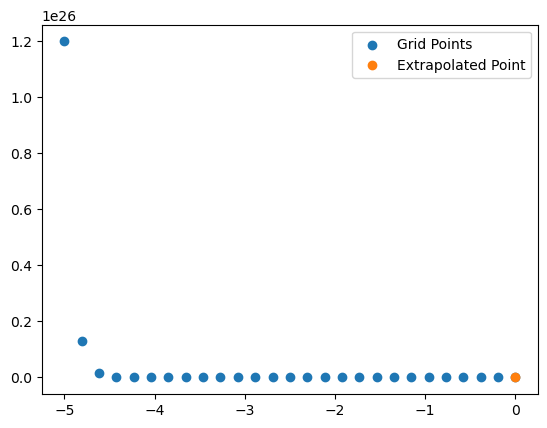

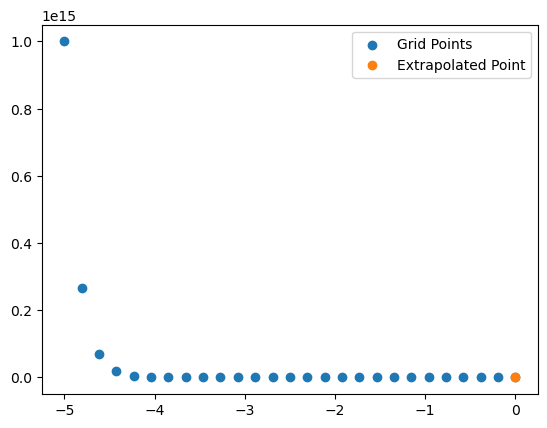

In [49]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)
print(test_dy)
a,b,x0,y0 = interpPowerLaw(test_x[-4:-1],test_y[-4:-1])
print(a,b,x0,y0)
y = powerLaw(test_x[-1],a,b,x0,y0)
dy = secondPowerLaw(test_x[-1],a,b,x0,y0)
print("Error: {:.6f}%".format(100*(test_dy[-1] - dy)/test_dy[-1]))

plt.figure()
plt.scatter(test_x,test_dy, label="Grid Points")
plt.scatter(test_x[-1],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

0.0 0.0 1.1108888888888888 0.5554444444444444
0 0 -1.6673333333333336 0.0
Error: nan%


/tmp/ipykernel_9213/3797617836.py:7: RuntimeWarning: invalid value encountered in scalar divide
  print("Error: {:.6f}%".format(100*(test_y[-1] - y)/test_y[-1]))


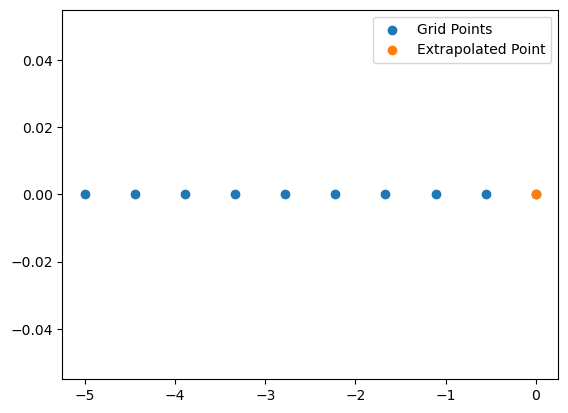

In [24]:
test_x = np.linspace(-5,-0.001,10)
test_y = np.zeros(10)

a,b,x0,y0 = interpPowerLaw(test_x[-4:-1],test_y[-4:-1])
print(a,b,x0,y0)
y = powerLaw(test_x[-1],a,b,x0,y0)
print("Error: {:.6f}%".format(100*(test_y[-1] - y)/test_y[-1]))

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

0.0 0.0 -0.21999999999999997 -0.1100000000000001
0 0 1.34 1.0
Error: 0.000000%


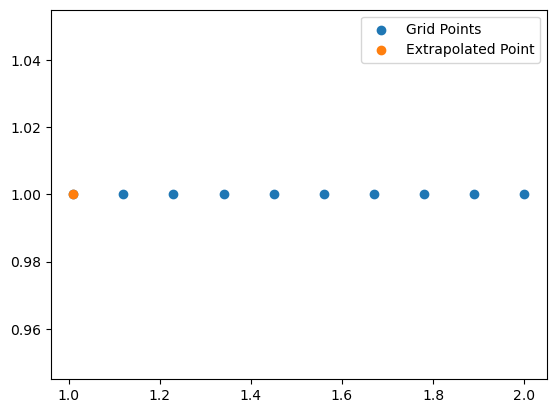

In [43]:
test_x = np.linspace(-5,-0.001,10)
test_y = np.ones(10)

a,b,x0,y0 = interpPowerLaw(test_x[::-1][-4:-1],test_y[::-1][-4:-1])
print(a,b,x0,y0)
y = powerLaw(test_x[0],a,b,x0,y0)
print("Error: {:.6f}%".format(100*(test_y[0] - y)/test_y[0]))

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()